In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install split-folders

import splitfolders  # or import split_folders

input_folder = '/content/drive/MyDrive/Deep Learning Project/Monkeypox Skin Image Dataset'

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#Train, val, test
splitfolders.ratio(input_folder, output='/content/drive/MyDrive/Deep Learning Project/Monkeypox Skin Image Dataset3', 
                   seed=42, ratio=(.7, .2, .1), 
                   group_prefix=None) # default values


# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# enable oversampling of imbalanced datasets, works only with fixed
splitfolders.fixed(input_folder, output='/content/drive/MyDrive/Deep Learning Project/Monkeypox Skin Image Dataset3', 
                   seed=42, fixed=(18, 9),oversample=False, group_prefix=None) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



Copying files: 0 files [00:00, ? files/s]
Copying files: 2 files [00:00,  4.00 files/s]
Copying files: 3 files [00:00,  3.70 files/s]
Copying files: 4 files [00:01,  3.37 files/s]
Copying files: 5 files [00:01,  3.28 files/s]
Copying files: 6 files [00:01,  3.28 files/s]
Copying files: 7 files [00:02,  2.90 files/s]
Copying files: 8 files [00:02,  2.57 files/s]
Copying files: 9 files [00:03,  2.46 files/s]
Copying files: 10 files [00:03,  2.19 files/s]
Copying files: 11 files [00:04,  2.21 files/s]
Copying files: 12 files [00:04,  2.39 files/s]
Copying files: 13 files [00:04,  2.38 files/s]
Copying files: 14 files [00:05,  2.33 files/s]
Copying files: 15 files [00:05,  2.44 files/s]
Copying files: 16 files [00:06,  2.57 files/s]
Copying files: 17 files [00:06,  2.88 files/s]
Copying files: 18 files [00:06,  3.09 files/s]
Copying files: 19 files [00:06,  3.09 files/s]
Copying files: 20 files [00:07,  2.82 files/s]
Copying files: 21 files [00:07,  2.27 files/s]
Copying files: 22 files [

In [64]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [65]:
train_path="/content/drive/MyDrive/Deep Learning Project/Monkeypox Skin Image Dataset3/train"
test_path="/content/drive/MyDrive/Deep Learning Project/Monkeypox Skin Image Dataset3/test"
val_path="/content/drive/MyDrive/Deep Learning Project/Monkeypox Skin Image Dataset3/val"

In [66]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)


In [67]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

In [80]:
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [81]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [82]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [83]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [104]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'sparse')

Found 662 images belonging to 4 classes.
Found 81 images belonging to 4 classes.
Found 192 images belonging to 4 classes.


In [105]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [106]:
training_set.class_indices

{'Chickenpox': 0, 'Measles': 1, 'Monkeypox': 2, 'Normal': 3}

In [107]:
train_x.shape,test_x.shape,val_x.shape

((662, 224, 224, 3), (81, 224, 224, 3), (192, 224, 224, 3))

In [108]:
train_y.shape,test_y.shape,val_y.shape

((662,), (81,), (192,))

In [109]:
# add preprocessing layer to the front of VGG

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [110]:
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [111]:
x = Flatten()(vgg.output)

In [112]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [113]:
# view the structure of the model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [114]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [95]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [115]:
train_y.shape

(662,)

In [116]:
train_x.shape

(662, 224, 224, 3)

In [117]:
val_y.shape

(192,)

In [118]:
val_x.shape

(192, 224, 224, 3)

In [119]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=16,shuffle=True)

Epoch 1/10
42/42 [==============================] - 481s 11s/step - loss: 1.0497 - accuracy: 0.6299 - val_loss: 0.8548 - val_accuracy: 0.6927
Epoch 2/10
42/42 [==============================] - 478s 11s/step - loss: 0.4347 - accuracy: 0.8595 - val_loss: 0.7817 - val_accuracy: 0.7760
Epoch 3/10
42/42 [==============================] - 487s 12s/step - loss: 0.3179 - accuracy: 0.8897 - val_loss: 0.7014 - val_accuracy: 0.7396
Epoch 4/10
42/42 [==============================] - 479s 11s/step - loss: 0.2108 - accuracy: 0.9290 - val_loss: 1.1409 - val_accuracy: 0.6823
Epoch 5/10
42/42 [==============================] - 477s 11s/step - loss: 0.2265 - accuracy: 0.9199 - val_loss: 0.8729 - val_accuracy: 0.7604
Epoch 6/10
42/42 [==============================] - 477s 11s/step - loss: 0.1169 - accuracy: 0.9728 - val_loss: 0.8775 - val_accuracy: 0.7604
Epoch 7/10
42/42 [==============================] - 477s 11s/step - loss: 0.1073 - accuracy: 0.9683 - val_loss: 0.8688 - val_accuracy: 0.7552
Epoch 

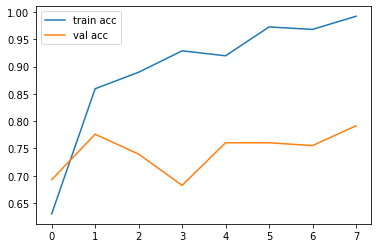

In [120]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

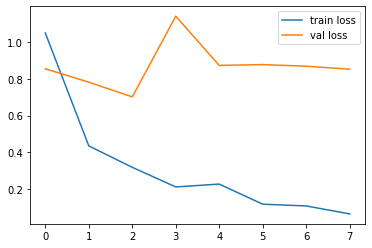

In [121]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [127]:
model.evaluate(test_x,test_y,batch_size=16)

6/6 [==============================] - 47s 7s/step - loss: 1.2567 - accuracy: 0.6790


[1.2566558122634888, 0.6790123581886292]

In [123]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [124]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [125]:
#get classification report
print(classification_report(y_pred,test_y))


              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.50      0.50      0.50        10
           2       0.86      0.71      0.78        35
           3       0.70      0.72      0.71        29

    accuracy                           0.68        81
   macro avg       0.60      0.63      0.60        81
weighted avg       0.71      0.68      0.69        81



In [126]:
print(confusion_matrix(y_pred,test_y))

[[ 4  0  1  2]
 [ 3  5  0  2]
 [ 3  2 25  5]
 [ 2  3  3 21]]
